雷达图（也称为蜘蛛图或星形图）是一种可视化视图，用于使用一致的比例尺显示三个或更多维度上的多元数据。并非每个人都是雷达图的忠实拥护者，但我认为雷达图能够以视觉上吸引人的方式比较不同类别各个特征的值。本文主要讲述通过matplotlib绘制雷达图。本文所有代码见：[Python-Study-Notes](https://github.com/luohenyueji/Python-Study-Notes/tree/master/Plot%20Items)

In [7]:
# 去掉警告
import warnings
warnings.filterwarnings("ignore")
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 基础雷达图 Basic radar chart
雷达图显示一个或几个实体的几个数值变量的值。下面是一个简单的示例，仅显示一个类别5个变量的值。据我所知，Matplotlib中没有允许生成雷达图的内建函数。因此，我们必须使用基本函数来构建它，这使得这有些小麻烦。以下实例输入数据是一个pandas数据框架，其中每一行表示一个类别，每一列表示一个变量。

[38.0, 29, 8, 7, 28, 38.0]


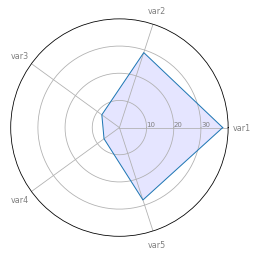

In [8]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
# 设定数据
df = pd.DataFrame({
    'group': ['A', 'B', 'C', 'D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})

# number of variable
# 变量类别
categories = list(df)[1:]
# 变量类别个数
N = len(categories)

# plot the first line of the data frame.
# 绘制数据的第一行
values = df.loc[0].drop('group').values.flatten().tolist()
# 将第一个值放到最后，以封闭图形
values += values[:1]
print(values)

# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
# 初始化极坐标网格
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
# 设置x轴的标签
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
# 设置标签显示位置
# 具体见https://www.bbsmax.com/A/x9J2DRwNd6/
ax.set_rlabel_position(0)
# 设置y轴的标签
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0, 40)

# Plot data
# 画图
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
# 填充区域
ax.fill(angles, values, 'b', alpha=0.1);

plt.show();

# 2 多类别变量雷达图 Radar chart with several individuals
这个例子跟上图一样，一旦你理解了这个方法，就很容易把它应用到多类别变量。注意，如果超过2到3个类别，我强烈建议使用分面绘图，而不是在同一个图上显示所有类别，这样会导致雷达图变得难以阅读。

首先创建一个坐标轴背景。

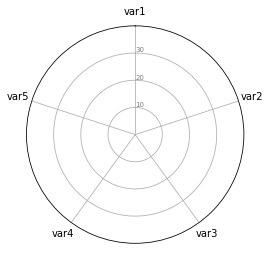

In [9]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame({
    'group': ['A', 'B', 'C', 'D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})


# ---------- 步骤1 创建背景

# number of variable
# 变量类别
categories = list(df)[1:]
# 变量类别个数
N = len(categories)

# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
# 初始化极坐标网格
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
# 设置角度偏移
ax.set_theta_offset(pi / 2)
# 设置顺时针还是逆时针，1或者-1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
# 设置x轴的标签
plt.xticks(angles[:-1], categories)

# Draw ylabels
# 画标签
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0, 40);

进而填充绘图

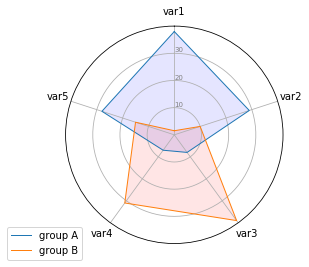

In [10]:
# ---------- 步骤1 创建背景

# number of variable
# 变量类别
categories = list(df)[1:]
# 变量类别个数
N = len(categories)

# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
# 初始化极坐标网格
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
# 设置角度偏移
ax.set_theta_offset(pi / 2)
# 设置顺时针还是逆时针，1或者-1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
# 设置x轴的标签
plt.xticks(angles[:-1], categories)

# Draw ylabels
# 画标签
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0, 40)

# ---------- 步骤1 绘制数据

# 单独绘制每一组数据
# Ind1
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values = df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)


# Add legend
# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1));


# 3 雷达图分面绘图 Use faceting for Radar chart
以上例子显示了如何制作一个或几个类别的雷达图。但是，建议不要在同雷达图上绘制多个类别，会导致雷达图难以阅读。当多类别绘图推荐分面绘图，即单独绘制每一个类别的雷达图，这样能够让每一个类别的雷达图保持清晰，并可以可以比较每个图的形状。

<Figure size 1000x1000 with 0 Axes>

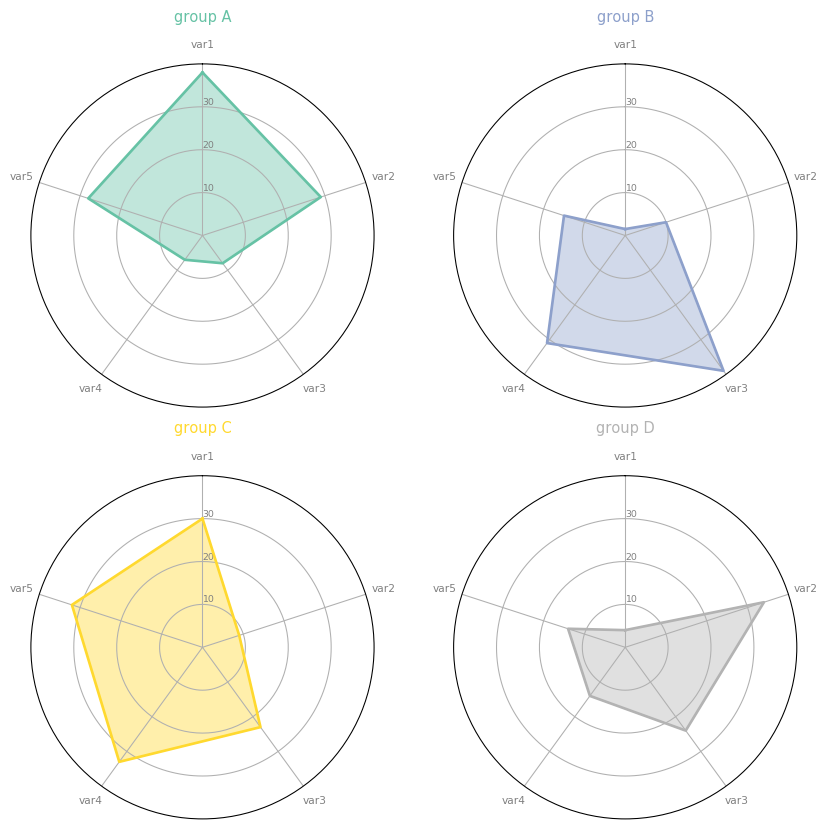

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

# ---------- 步骤1 创建背景
def make_spider( row, title, color):

    # number of variable
    # 变量类别
    categories = list(df)[1:]
    # 变量类别个数
    N = len(categories)
    
    # 设置每个点的角度值
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    # 分图
    ax = plt.subplot(2,2,row+1, polar=True, )
    
    # If you want the first axis to be on top:
    # 设置角度偏移
    ax.set_theta_offset(pi / 2)
    # 设置顺时针还是逆时针，1或者-1
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    # 设置x轴的标签
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    # 画标签
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
    
    # Ind
    # 填充数据
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    # 设置标题
    plt.title(title, size=11, color=color, y=1.1)


# ---------- 步骤2 绘制图形
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
# 设定颜色
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

# 4 参考
+ > [Radar](https://python-graph-gallery.com/category/radar/)
+ > [Area chart and faceting](http://python-graph-gallery.com/242-area-chart-and-faceting/)